# Use xraydb python database to estimate absorption coefficient (https://xraypy.github.io/XrayDB/python.html)
## The code below compute linear absorption coefficient value of Fe at 20keV. Modify it to compute Al linear absorption coefficient of Al at 40keV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xraydb

# material and energy definition : energy is in eV
Material='Fe'
Energy=20000  # in eV

# compute mu value with xraydb in cm-1
mu=xraydb.material_mu(Material,Energy)
print('Material ', Material)
print('Energy in keV = ',Energy/1000)
print('mu (cm-1) = ', mu)


Material  Fe
Energy in keV =  20.0
mu (cm-1) =  202.3822222844012


# Use xraydb python database to estimate absorption coefficient
## The code below plot the linear absorption coefficient as a function of energy for Fe between 10keV and 200keV. Modify to plot linear absorption coefficient as a function of energy for Al between 10keV and 60keV

Text(0.5, 1.0, 'Material = Fe ')

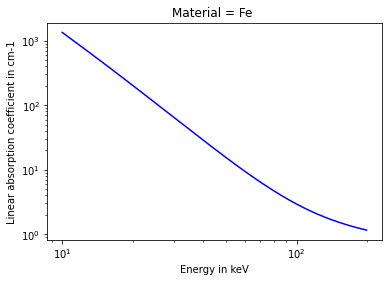

In [2]:
# material 
Material='Fe'

# Energy range 10keV to 200keV
Emin=10000.0
Emax=200000.0
Estep = 1000.0
Energy_range=np.arange (Emin,Emax,Estep)

# compute transmission for a specific thickness using Beer Lambert Law for various energies
mu=xraydb.material_mu(Material,Energy_range)

# plot mu vs energy
plt.figure(1)

plt.loglog(Energy_range/1000,mu,'b-')   
plt.xlabel('Energy in keV')
plt.ylabel('Linear absorption coefficient in cm-1')
title='Material = %s ' %(Material)
plt.title(title)


# Use xraydb python database to estimate delta coefficient
## the code below compute delta and beta value for Fe at 100keV and also delta/beta. Use this code to obtain the delta / beta ratio useful for paganin reconstruction for Al at 20keV

In [3]:
# material 
Material='Fe'
density=7.8 # g/cm3

# Energy 
Energy=100000.0

# compute transmission for a specific thickness using Beer Lambert Law for various energies
info = xraydb.xray_delta_beta(Material, density, Energy)
delta=info[0]
beta=info[1]

# show values 
print('Material ', Material)
print('Energy in keV = ',Energy/1000)
print('delta = ', delta)
print('beta = ', beta)
print('delta/beta = ', delta/beta)


Material  Fe
Energy in keV =  100.0
delta =  1.5060996637854784e-07
beta =  1.5518088777192557e-10
delta/beta =  970.5445595845813


# Use xraydb python database to estimate transmission for a fixed energy
## This code compute transmission for a specific thickness using Beer Lambert Law for Fe at 20keV and 60keV. Knowing that tomography requires at least 0.2 transmission which energy is best to use between 20keV and 60 keV ?

In [4]:
# material and energy definition : energy is in eV
Material='Fe'
Energy=20000  # in eV

# compute mu value with xraydb in cm-1
mu=xraydb.material_mu(Material,Energy)

# thickness
t=0.1 # in cm

#compute transmission using Beer Lambert law
transmission=np.exp(-mu*t)
print('Material ', Material)
print('Energy in keV = ',Energy/1000)
info ='transmission for (%f cm) = %e' %(t,transmission)
print(info)



Material  Fe
Energy in keV =  20.0
transmission for (0.100000 cm) = 1.624246e-09


# Use xraydb python database to estimate transmission for an energy range
## This code compute the transmission through 0.1 cm of Fe as a function of energy : what minimum energy is required for a transmission of 0.2  and thickness of 2 mm?

Text(0.5, 1.0, 'Material = Fe / thickness = 0.1000 cm')

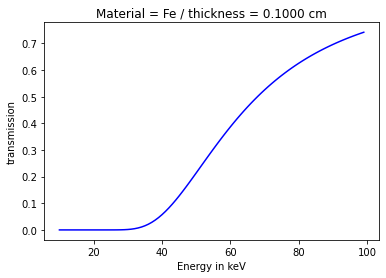

In [6]:
plt.close('all')

# Material information
Material='Fe'
thickness=0.1 # in cm

# Energy range 10keV to 100keV
Emin=10000.0
Emax=100000.0
Estep = 1000.0
Energy_range=np.arange (Emin,Emax,Estep)

# compute transmission for a specific thickness using Beer Lambert Law for various energies
mu=xraydb.material_mu(Material,Energy_range)
trans=np.exp(-mu*thickness)

# plot transmission coefficient vs energy
plt.figure(1)

plt.plot(Energy_range/1000,trans,'b-')   
plt.xlabel('Energy in keV')
plt.ylabel('transmission')
title='Material = %s / thickness = %0.4f cm' %(Material,t)
plt.title(title)
